# Atividade Prática 3

## 2. Regressão

Carrega a biblioteca ANFIS

In [2]:
from matplotlib import pyplot as plt
import sys
import itertools
import numpy as np

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

Seguindo a metodologia como nos exemplos do repositório, define-se a função geradora e os parâmetros do modelo.

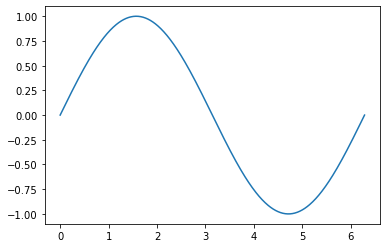

### Training for 20 epochs, training size = 500 cases
epoch    0: MSE=0.00052, RMSE=0.02286 =inf%
epoch    1: MSE=0.00052, RMSE=0.02285 =inf%
epoch    2: MSE=0.00052, RMSE=0.02285 =inf%
epoch    3: MSE=0.00052, RMSE=0.02284 =inf%
epoch    4: MSE=0.00052, RMSE=0.02283 =inf%
epoch    5: MSE=0.00052, RMSE=0.02281 =inf%
epoch    6: MSE=0.00052, RMSE=0.02279 =inf%
epoch    7: MSE=0.00052, RMSE=0.02277 =inf%
epoch    8: MSE=0.00052, RMSE=0.02275 =inf%
epoch    9: MSE=0.00052, RMSE=0.02272 =inf%
epoch   10: MSE=0.00052, RMSE=0.02270 =inf%
epoch   11: MSE=0.00051, RMSE=0.02267 =inf%
epoch   12: MSE=0.00051, RMSE=0.02264 =inf%
epoch   13: MSE=0.00051, RMSE=0.02261 =inf%
epoch   14: MSE=0.00051, RMSE=0.02258 =inf%
epoch   15: MSE=0.00051, RMSE=0.02255 =inf%
epoch   16: MSE=0.00051, RMSE=0.02251 =inf%
epoch   17: MSE=0.00051, RMSE=0.02248 =inf%
epoch   18: MSE=0.00050, RMSE=0.02244 =inf%
epoch   19: MSE=0.00050, RMSE=0.02240 =inf%


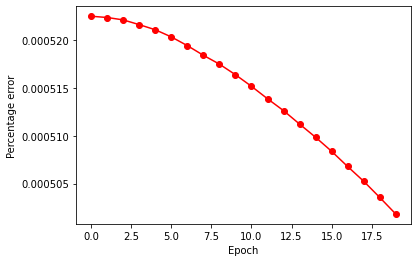

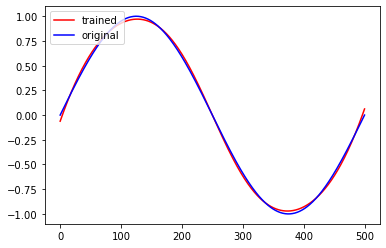

In [6]:
def sin(x):
    return np.sin(x)

def make_sin(batch_size=1024):
    '''
        Gera funcao seno
    '''

    x = torch.linspace(0, 2*np.pi, 500).reshape(-1, 1)
    y = torch.tensor([sin(p) for p in x], dtype=dtype).reshape(-1, 1)

    plt.plot(x, y)
    plt.show()

    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

def ex1_model():
    '''
        Define modelo e parametros para funcoes de pertinencia
    '''
    invardefs = [
            ('x0', make_bell_mfs(3.33333, 2, list(np.linspace(0, 2*np.pi, 3))))
            ]
    outvars = ['y0']

    anf = anfis.AnfisNet('Aproximacao senoidal', invardefs, outvars)
    return anf

if __name__ == '__main__':
    model = ex1_model()
    train_data = make_sin(batch_size = 100)
    train_anfis(model, train_data, 20, True)
    

Para um exemplo ruidoso, a implementação é análoga

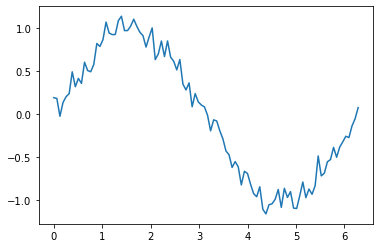

### Training for 20 epochs, training size = 100 cases
epoch    0: MSE=0.01099, RMSE=0.10482 =32.01%
epoch    1: MSE=0.01099, RMSE=0.10482 =32.01%
epoch    2: MSE=0.01099, RMSE=0.10482 =32.01%
epoch    3: MSE=0.01099, RMSE=0.10482 =32.01%
epoch    4: MSE=0.01099, RMSE=0.10482 =32.01%
epoch    5: MSE=0.01099, RMSE=0.10482 =32.01%
epoch    6: MSE=0.01099, RMSE=0.10481 =32.01%
epoch    7: MSE=0.01099, RMSE=0.10481 =32.00%
epoch    8: MSE=0.01099, RMSE=0.10481 =32.00%
epoch    9: MSE=0.01099, RMSE=0.10481 =32.00%
epoch   10: MSE=0.01098, RMSE=0.10481 =32.00%
epoch   11: MSE=0.01098, RMSE=0.10481 =32.00%
epoch   12: MSE=0.01098, RMSE=0.10481 =32.00%
epoch   13: MSE=0.01098, RMSE=0.10480 =31.99%
epoch   14: MSE=0.01098, RMSE=0.10480 =31.99%
epoch   15: MSE=0.01098, RMSE=0.10480 =31.99%
epoch   16: MSE=0.01098, RMSE=0.10480 =31.99%
epoch   17: MSE=0.01098, RMSE=0.10479 =31.98%
epoch   18: MSE=0.01098, RMSE=0.10479 =31.98%
epoch   19: MSE=0.01098, RMSE=0.10479 =31.98%


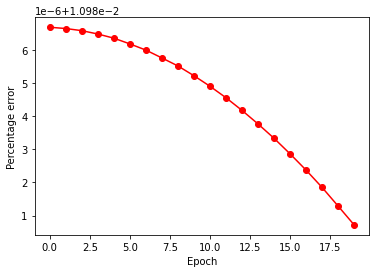

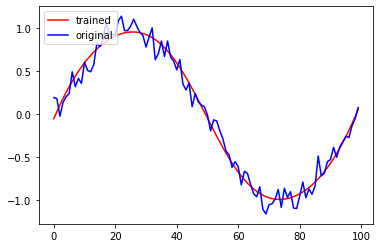

In [10]:
def noisy_sin(x):
    return np.sin(x) + 0.1 * np.random.normal(0, 1, 1)

def make_noisy_sin(batch_size=1024):
    '''
        Gera funcao seno
    '''

    x = torch.linspace(0, 2*np.pi, 100).reshape(-1, 1)
    y = torch.tensor([noisy_sin(p) for p in x], dtype=dtype).reshape(-1, 1)

    plt.plot(x, y)
    plt.show()

    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

if __name__ == '__main__':
    model = ex1_model()
    train_data = make_noisy_sin(batch_size = 100)
    train_anfis(model, train_data, 20, True)

Note que mesmo com entrada ruidosa, a curva gerada manteve o contorno senoidal.